# simple linear regression

## importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
kky=pd.read_csv(" Salary.csv")

In [3]:
kky.head()

,years_experience,salary
0,1.0,325000
1,1.2,361259
2,1.6,340000
3,2.0,414101
4,2.3,405000


In [4]:
kky.tail()

,years_experience,salary
20,6.9,930000
21,7.1,920000
22,7.3,910000
23,7.5,931910
24,7.7,951010


In [5]:
kky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   years_experience  25 non-null     float64
 1   salary            25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
kky.describe()

,years_experience,salary
count,25.000000,25.000000
mean,4.476000,671171.240000
std,2.055132,208426.028725
min,1.000000,325000.000000
25%,3.000000,500000.000000
50%,4.400000,680000.000000
75%,6.100000,860000.000000
max,7.700000,951010.000000


In [7]:
kky.std()

years_experience         2.055132
salary              208426.028725
dtype: float64

In [8]:
kky.isnull().sum()

years_experience    0
salary              0
dtype: int64

In [9]:
kky.duplicated().sum()

0

## Divide the dataset into independent and dependent variable

In [10]:
x=kky.iloc[:,:-1]
y=kky.iloc[:,-1]

In [11]:
print(x)

    years_experience
0                1.0
1                1.2
2                1.6
3                2.0
4                2.3
5                2.8
6                3.0
7                3.3
8                3.6
9                3.6
10               4.0
11               4.1
12               4.4
13               4.5
14               4.9
15               5.1
16               5.3
17               5.9
18               6.1
19               6.7
20               6.9
21               7.1
22               7.3
23               7.5
24               7.7


In [12]:
print(y)

0     325000
1     361259
2     340000
3     414101
4     405000
5     500000
6     495000
7     541000
8     568190
9     640000
10    610000
11    626710
12    690101
13    680000
14    760000
15    800000
16    780000
17    840000
18    860000
19    900000
20    930000
21    920000
22    910000
23    931910
24    951010
Name: salary, dtype: int64


## cross validation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [15]:
X_train.shape

(20, 1)

In [16]:
X_test.shape

(5, 1)

In [17]:
Y_train.shape

(20,)

In [18]:
Y_test.shape

(5,)

## model selection

## Training the model using Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()

In [21]:
model

LinearRegression()

In [22]:
kk=model.fit(X_train,Y_train)

In [23]:
kk

LinearRegression()

In [36]:
X_trainacc=kk.predict(X_train) #ypred

## Visualizing the training Set

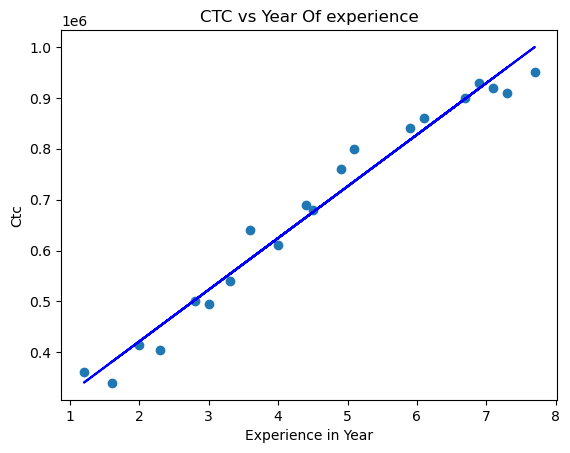

In [44]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,X_trainacc,color='blue')
plt.title("CTC vs Year Of experience")
plt.xlabel("Experience in Year")
plt.ylabel("Ctc")
plt.show()

In [34]:
training_accuracy=kk.score(X_train,Y_train)

In [35]:
training_accuracy

0.9738373563510925

In [38]:
from sklearn.metrics import r2_score
r = r2_score(Y_train,X_trainacc)
print("R2 score : ",r)

R2 score :  0.9738373563510925


## Visualizing The testing set

In [45]:
X_testacc=kk.predict(X_test)

In [46]:
kk.score(X_test,Y_test)

0.9848393154710576

In [47]:
rv = r2_score(Y_test,X_testacc)
print("R2 score : ",rv)

R2 score :  0.9848393154710576


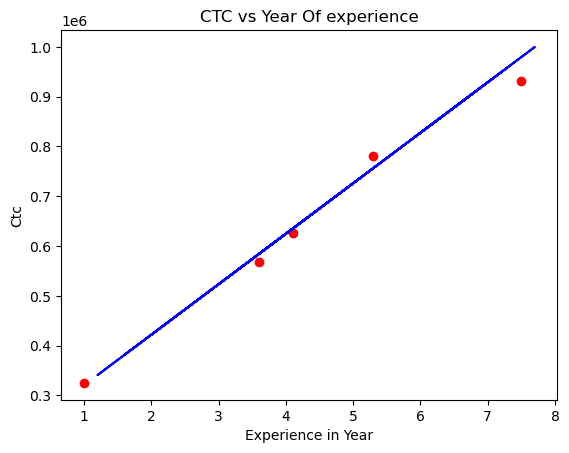

In [69]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,X_trainacc,color='blue')
plt.title("CTC vs Year Of experience")
plt.xlabel("Experience in Year")
plt.ylabel("Ctc")
plt.show()

/Users/pritikumari/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

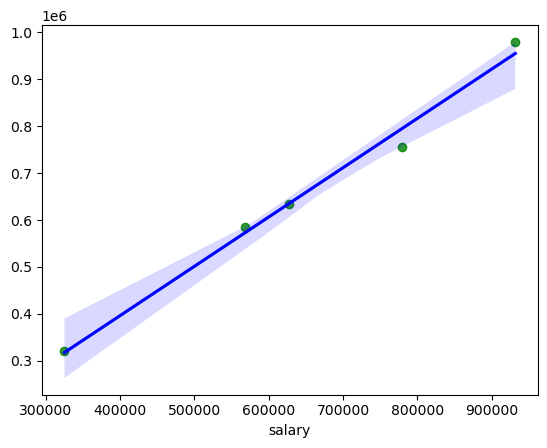

In [67]:
sns.regplot(Y_test,X_testacc,scatter_kws={"color":"green"},line_kws={"color":"blue"})